In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = 'Arial'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

## 构建实验数据

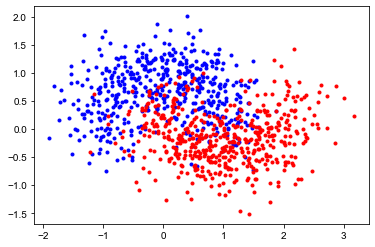

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=1000, noise=0.4, random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],'b.')
plt.plot(X[:,0][y==1],X[:,1][y==1],'r.')
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X,y)

## 硬投票

In [3]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

rng = RandomForestClassifier(random_state=42)
lg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
vote = VotingClassifier(estimators=[('rng',rng),('lg',lg),('svm',svm)], voting='hard')
vote.fit(X_train, y_train)

VotingClassifier(estimators=[('rng', RandomForestClassifier(random_state=42)),
                             ('lg', LogisticRegression(random_state=42)),
                             ('svm', SVC(random_state=42))])

In [4]:
from sklearn.metrics import accuracy_score
print("accrracy:")
for clf in (rng,lg,svm,vote):
    clf.fit(X_train,y_train)
    y_pre = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pre))

accrracy:
RandomForestClassifier 0.872
LogisticRegression 0.836
SVC 0.86
VotingClassifier 0.876


## 软投票

In [5]:
rng = RandomForestClassifier(random_state=42)
lg = LogisticRegression(random_state=42)
svm = SVC(probability=True)
vote = VotingClassifier(estimators=[('rng',rng),('lg',lg),('svm',svm)], voting='soft')
vote.fit(X_train, y_train)

print("accrracy:")
for clf in (rng,lg,svm,vote):
    clf.fit(X_train,y_train)
    y_pre = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pre))

accrracy:
RandomForestClassifier 0.872
LogisticRegression 0.836
SVC 0.86
VotingClassifier 0.864
